<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

--2025-06-15 15:28:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   259MB/s    in 0.6s    

2025-06-15 15:28:51 (259 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [28]:
def unzip(zip_link):
  zip_ref = zipfile.ZipFile(zip_link)
  zip_ref.extractall()
  zip_ref.close()

#Pre processing data

In [3]:
import os
def walk_through_dir(dir_path):
  for dirpath, dir_name, files in os.walk(dir_path):
    print(f"There are {len(dir_name)} folders, {len(files)} files in {dirpath}")

In [4]:
walk_through_dir('10_food_classes_10_percent')

There are 2 folders, 0 files in 10_food_classes_10_percent
There are 10 folders, 0 files in 10_food_classes_10_percent/test
There are 0 folders, 250 files in 10_food_classes_10_percent/test/hamburger
There are 0 folders, 250 files in 10_food_classes_10_percent/test/ramen
There are 0 folders, 250 files in 10_food_classes_10_percent/test/chicken_wings
There are 0 folders, 250 files in 10_food_classes_10_percent/test/ice_cream
There are 0 folders, 250 files in 10_food_classes_10_percent/test/grilled_salmon
There are 0 folders, 250 files in 10_food_classes_10_percent/test/chicken_curry
There are 0 folders, 250 files in 10_food_classes_10_percent/test/fried_rice
There are 0 folders, 250 files in 10_food_classes_10_percent/test/sushi
There are 0 folders, 250 files in 10_food_classes_10_percent/test/steak
There are 0 folders, 250 files in 10_food_classes_10_percent/test/pizza
There are 10 folders, 0 files in 10_food_classes_10_percent/train
There are 0 folders, 75 files in 10_food_classes_10_

In [5]:
import pathlib
def get_class_names(train_path):
  data_dir = pathlib.Path(train_path)
  class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
  return class_names

In [ ]:
get_class_names('10_food_classes_10_percent/test')

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [6]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

- instead of using ImageDataGenerator, this time we will be using tf.keras.preprocessing.image_dataset_from_directory(), which returns a tf.data.Dataset object.
- This type of dataset is faster than ImageDataGeberator API and comes with multiple functions.

In [7]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(224,224),
                                                                 batch_size=32,
                                                                 label_mode='categorical')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=(224,224),
                                                                batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

- below we can see that the values of images are not scaled and the labels are all ONE HOT ENCODED.
- there is no need to scale the images now as most models have a scale layer within them that does the job.(resnet doesnt have)

In [ ]:
for images, labels in train_data.take(1):
  print(images)
  print(labels)

tf.Tensor(
[[[[5.10000000e+01 6.10000000e+01 6.30000000e+01]
   [5.10255089e+01 6.10255089e+01 6.30255089e+01]
   [4.75663261e+01 5.75663261e+01 5.93520393e+01]
   ...
   [7.29948196e+01 3.87805557e+01 1.31377621e+01]
   [7.13061371e+01 3.72346954e+01 1.08265114e+01]
   [7.50153656e+01 3.73010063e+01 7.58665228e+00]]

  [[4.58571396e+01 5.58571396e+01 5.78571396e+01]
   [4.81428566e+01 5.81428566e+01 6.01428566e+01]
   [4.61428566e+01 5.61428566e+01 5.79285698e+01]
   ...
   [7.27194672e+01 3.89031219e+01 1.10919819e+01]
   [8.04438934e+01 4.63724556e+01 1.82958965e+01]
   [7.99336777e+01 4.28621483e+01 1.05049706e+01]]

  [[4.17857132e+01 5.13571434e+01 5.33571434e+01]
   [4.18571396e+01 5.14285698e+01 5.34285698e+01]
   [3.79540825e+01 4.75255089e+01 4.87397957e+01]
   ...
   [6.70713425e+01 3.56428146e+01 6.21428585e+00]
   [6.96020737e+01 3.64591904e+01 5.38774776e+00]
   [7.32908936e+01 3.65765381e+01 1.79078960e+00]]

  ...

  [[9.42756348e+01 3.51328201e+01 1.15716248e+01]
   [1

# Creating models

## Model 0

In [9]:
# create the base model(trained) from tf.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# freeze the weights
base_model.trainable = False

# create the input layer with input shape as (224,224,3)
inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# suppose you are using resnet which does not have a scaling layer we must scale it
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# pass the output of the input layer to the base_model
x = base_model(inputs)

# pass the ouput pf the base_model to the average pooling layer which
# aggregates most important information and reduces number of computations
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# pass the output of the average layer to the output layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# create the model using the inputs and outputs layers
model_0 = tf.keras.Model(inputs,outputs)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [11]:
zero_history = model_0.fit(train_data,
                           epochs=5,
                           steps_per_epoch=len(train_data),
                           validation_data=test_data,
                           validation_steps=len(test_data))

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.2459 - loss: 2.0889 - val_accuracy: 0.7252 - val_loss: 1.3299
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 252ms/step - accuracy: 0.7586 - loss: 1.2026 - val_accuracy: 0.8080 - val_loss: 0.9015
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - accuracy: 0.8068 - loss: 0.8635 - val_accuracy: 0.8344 - val_loss: 0.7235
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.8639 - loss: 0.6902 - val_accuracy: 0.8460 - val_loss: 0.6281
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.8543 - loss: 0.5910 - val_accuracy: 0.8580 - val_loss: 0.5727


In [20]:
def plot_curves(history):
  loss_train = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)

  plt.plot(epochs,loss_train,'r',label='Training Loss')
  plt.plot(epochs,val_loss,'b',label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)

  plt.plot(epochs,accuracy,'r',label='Training Accuracy')
  plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

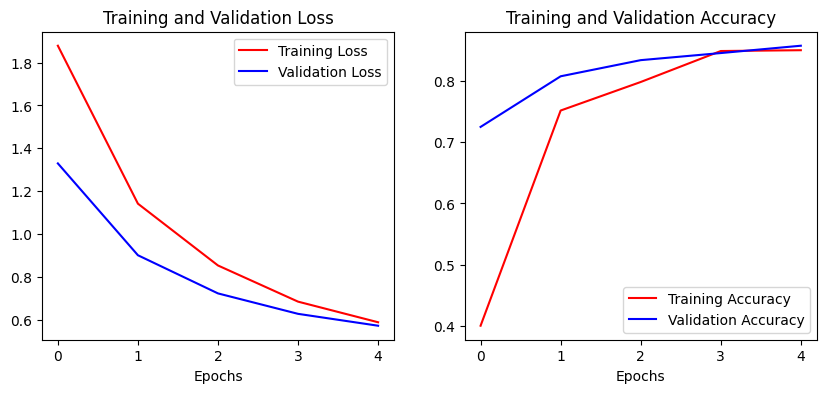

In [21]:
plot_curves(zero_history)

### understanding globalaveragepooling2d

In [24]:
shape = (1,4,4,3)

tf.random.set_seed(42)

tensor = tf.random.normal(shape)
print(f"Sample output of the pre-trained model - {tensor}")

global_average_pool_layer_output = tf.keras.layers.GlobalAveragePooling2D()(tensor)
print(f"Output of the global average pooling layer - {global_average_pool_layer_output}")

tensor.shape, global_average_pool_layer_output.shape

Sample output of the pre-trained model - [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]
Output of the global average pooling layer - [[-0.09368646 -0.45840448 -0.2885598 ]]


(TensorShape([1, 4, 4, 3]), TensorShape([1, 3]))

In [26]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(tensor, axis=[1, 2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

- The convolutional layers of the model (which are pretrained on ImageNet) extract `features` which are earned patterns the model uses to differentiate between classes like edges, textures and shapes.
- After the convolutional layers, a GlobalAveragePooling2D layer is applied. This layer collapses the 4D spatial dimensions of the final convolutional feature maps into a 2D vector for EfficientNetB0.
- The result is a feature vector which is a numeric vector that captures abstract high-level information about the input image.

## Model 1

- this is going to be a feature extraction transfer learning model trained on 1 percent of the 10 class food data with data augmentation
- only the training data is going to change and not the testing data as we want that to be common among all models.

In [27]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-06-15 15:54:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   101MB/s    in 1.3s    

2025-06-15 15:54:47 (101 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [30]:
unzip('10_food_classes_1_percent.zip')

In [32]:
walk_through_dir('10_food_classes_1_percent')

There are 2 folders, 0 files in 10_food_classes_1_percent
There are 10 folders, 0 files in 10_food_classes_1_percent/test
There are 0 folders, 250 files in 10_food_classes_1_percent/test/hamburger
There are 0 folders, 250 files in 10_food_classes_1_percent/test/ramen
There are 0 folders, 250 files in 10_food_classes_1_percent/test/chicken_wings
There are 0 folders, 250 files in 10_food_classes_1_percent/test/ice_cream
There are 0 folders, 250 files in 10_food_classes_1_percent/test/grilled_salmon
There are 0 folders, 250 files in 10_food_classes_1_percent/test/chicken_curry
There are 0 folders, 250 files in 10_food_classes_1_percent/test/fried_rice
There are 0 folders, 250 files in 10_food_classes_1_percent/test/sushi
There are 0 folders, 250 files in 10_food_classes_1_percent/test/steak
There are 0 folders, 250 files in 10_food_classes_1_percent/test/pizza
There are 10 folders, 0 files in 10_food_classes_1_percent/train
There are 0 folders, 7 files in 10_food_classes_1_percent/train/h

In [33]:
get_class_names('10_food_classes_1_percent/train')

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [34]:
train_dir = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [61]:
one_percent_train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           batch_size=32,
                                                                           image_size=(224,224),
                                                                           label_mode='categorical')
one_percent_test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                          image_size=(224,224),
                                                                          label_mode='categorical',
                                                                          batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### data augmentation keras layer

- Now we are going to augment the training data. we are going to add all the types of augmentations suchs as zoom, rotate and more as part of one sequential model.
- then we are going to add this layer into our final model.
- doing data augmentation through this way uses the GPU while doing it through ImageDataGenerator uses the CPU slowing the runtime
- the augmentation layer added will only work when the model is training and during testing or predictions it becomes dormant.

In [51]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(224,224,3)),
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

### viewing the augmented data

In [52]:
import matplotlib.image as mpimg
import random

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

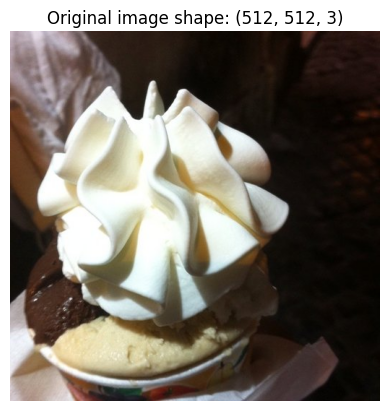

In [53]:
random_class = random.choice(one_percent_train_data.class_names)
target_dir = '10_food_classes_1_percent/train/'+ random_class
image_file = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + image_file
image = mpimg.imread(random_image_path)
plt.imshow(image)
plt.title(f"Original image shape: {image.shape}")
plt.axis(False)

- we have pass a 4 dimensional image to the data augmentation model as it excpects batch size so we use `tf.expand_dims()`
- after data is augmentated it wont be in integer but in float type.
- for `imshow` to display an image if it is in float the values must range from 0-1. and we must squeeze it it 3 dimensions as well

(np.float64(-0.5), np.float64(470.5), np.float64(416.5), np.float64(-0.5))

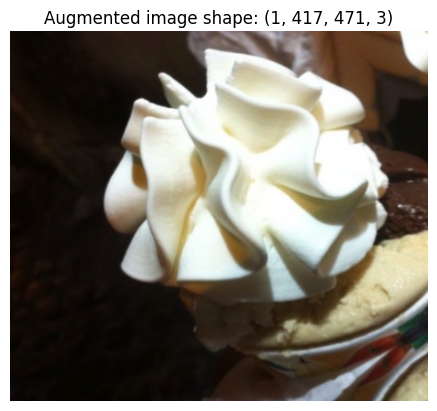

In [54]:
augmented_image = data_augmentation(tf.expand_dims(image,axis=0))
plt.imshow(tf.squeeze(augmented_image)/255.)
plt.title(f"Augmented image shape: {augmented_image.shape}")
plt.axis(False)

### creating model 1

In [56]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name='input layer')

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_1 = tf.keras.Model(inputs,outputs)

In [57]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [62]:
model_1_history = model_1.fit(one_percent_train_data,
                               epochs=5,
                               steps_per_epoch=len(one_percent_train_data),
                               validation_data=one_percent_test_data,
                               validation_steps=len(one_percent_test_data))

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.0819 - loss: 2.3869 - val_accuracy: 0.1820 - val_loss: 2.2164
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.1677 - loss: 2.1685 - val_accuracy: 0.2532 - val_loss: 2.1149
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.3225 - loss: 1.9745 - val_accuracy: 0.3248 - val_loss: 2.0228
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4766 - loss: 1.8877 - val_accuracy: 0.3836 - val_loss: 1.9343
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.5318 - loss: 1.7729 - val_accuracy: 0.4216 - val_loss: 1.8494


`which just 7 images per class we were able to achieve 50% accuracy. crazzzyyyy`

In [63]:
model_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

In [64]:
model_1.evaluate(one_percent_test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.4218 - loss: 1.8541


[1.8493824005126953, 0.42160001397132874]

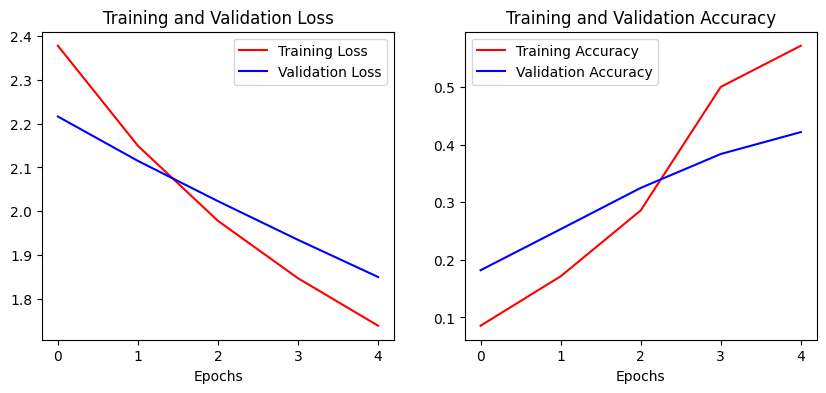

In [65]:
plot_curves(model_1_history)